## Continued from Tools_project.... In this file, it is ensured that Top 100 songs file and random songs have unique values. Subsequently, the files are merged and logistic regression is applied to the dataset. This is the first attempt - model has not been tested yet.

In [187]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [126]:
df = pd.read_csv("Random_songs_2000-2017.csv")
df1 = pd.read_csv('Billboard_Top100_songs.csv')

In [127]:
df_mod = df.drop_duplicates(subset= 'Track', keep='first', inplace = False)

In [128]:
df1_mod = df1.drop_duplicates(subset= 'Track', keep='first', inplace = False)

In [129]:
frames = [df_mod, df1_mod]
df2 = pd.concat(frames)

In [130]:
df2

,Unnamed: 0,Year,Artist,Track,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time_Signature,Track_Popularity,Top
0,0,2000,The Weakerthans,Left and Leaving,0.592,0.513,11,-10.183,1,0.0288,0.477000,0.000446,0.1070,0.2450,116.752,285827,4,39,0
1,1,2001,Juan Carlos Alvarado,Vivo Para Cristo,0.417,0.493,0,-4.011,1,0.0282,0.731000,0.000000,0.2010,0.2600,108.377,527133,4,48,0
2,2,2001,Shakira,Laundry Service,0.767,0.828,0,-6.249,0,0.0397,0.184000,0.001840,0.1140,0.8290,121.003,253067,4,50,0
3,3,2003,Frankie J,Playlist: The Very Best Of Frankie J,0.733,0.405,7,-8.740,1,0.0278,0.291000,0.000000,0.3650,0.4670,100.020,240884,4,36,0
4,4,2003,Lionel Richie,The Definitive Collection,0.581,0.529,10,-9.664,0,0.0289,0.222000,0.001660,0.1100,0.3280,132.336,254760,4,36,0
5,5,2002,Gregg Allman,20th Century Masters: The Millennium Collectio...,0.550,0.383,0,-15.725,1,0.0246,0.202000,0.019100,0.1170,0.4200,86.711,268240,4,38,0
6,6,2001,TobyMac,Momentum,0.789,0.945,10,-2.206,0,0.0895,0.021200,0.000625,0.1470,0.6880,100.008,195651,4,34,0
7,7,2003,Michael Jackson,Number Ones,0.930,0.602,11,-4.433,0,0.0401,0.019200,0.016500,0.0437,0.8490,117.086,293200,4,42,0
8,8,2000,NOFX,Pump Up The Valuum,0.373,0.860,7,-4.298,1,0.0386,0.000028,0.000000,0.3250,0.7200,156.003,109640,4,39,0
9,9,2001,Aesop Rock,Labor Days,0.564,0.758,11,-6.850,1,0.2830,0.024200,0.001090,0.3760,0.5970,92.674,266107,4,50,0


In [131]:
df2_mod = df2.drop_duplicates(subset= 'Track', keep='first', inplace = False)



In [134]:
df2_mod = df2.drop(columns =['Unnamed: 0'])

In [135]:
df2_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 1797
Data columns (total 18 columns):
Year                3534 non-null int64
Artist              3534 non-null object
Track               3534 non-null object
Danceability        3534 non-null float64
Energy              3534 non-null float64
Key                 3534 non-null int64
Loudness            3534 non-null float64
Mode                3534 non-null int64
Speechiness         3534 non-null float64
Acousticness        3534 non-null float64
Instrumentalness    3534 non-null float64
Liveness            3534 non-null float64
Valence             3534 non-null float64
Tempo               3534 non-null float64
Duration_ms         3534 non-null int64
Time_Signature      3534 non-null int64
Track_Popularity    3534 non-null int64
Top                 3534 non-null int64
dtypes: float64(9), int64(7), object(2)
memory usage: 524.6+ KB


In [156]:
df2_mod_values = df2_mod.columns.values.tolist()
y=['Top']
x =[i for i in df2_mod_values if i not in y]
del x[0:3]

In [160]:
X = df2_mod[x]
Y = df2_mod[y]

In [165]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())
#### This is the first logistic regressionmodel to find out significant variables ######

Optimization terminated successfully.
         Current function value: 0.613705
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.108      
Dependent Variable: Top              AIC:              4365.6668  
Date:               2018-11-25 07:02 BIC:              4452.0494  
No. Observations:   3534             Log-Likelihood:   -2168.8    
Df Model:           13               LL-Null:          -2431.2    
Df Residuals:       3520             LLR p-value:      8.0087e-104
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Danceability       -0.0126   0.3153 -0.0401 0.9680 -0.6306  0.6053
Energy             -1.7209   0.3609 -4.7683 0.0000 -2

If p value > 0.05, we need to remove those variables as they are not significant for the model!

In [166]:
x1 = ['Energy', 'Loudness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Duration_ms', 'Track_Popularity']
X1 = df2_mod[x1]

In [167]:
logit_model=sm.Logit(Y,X1)
result=logit_model.fit()
print(result.summary2())
#### Second on eto check if all p values are less than 0.05 ######

Optimization terminated successfully.
         Current function value: 0.614644
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.107      
Dependent Variable: Top              AIC:              4360.3049  
Date:               2018-11-25 07:11 BIC:              4409.6664  
No. Observations:   3534             Log-Likelihood:   -2172.2    
Df Model:           7                LL-Null:          -2431.2    
Df Residuals:       3526             LLR p-value:      1.0164e-107
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Energy             -1.5026   0.2642 -5.6868 0.0000 -2.0204 -0.9847
Loudness            0.1918   0.0200  9.5851 0.0000  0

# Fitting the logistic regression model on training set and checking it's accuracy on test set

In [168]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.25, random_state=0)



In [169]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
print(f'R-square of training model = {logreg.score(x_train,y_train)}') 

R-square of training model = 0.6830188679245283


In [182]:
predicted_values = logreg.predict(x_train)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [172]:
print(classification_report(y_train, predicted_values))

             precision    recall  f1-score   support

          0       0.63      1.00      0.77      1444
          1       1.00      0.30      0.47      1206

avg / total       0.80      0.68      0.63      2650



In [179]:
y_pred = logreg.predict(x_test)
accuracy = logreg.score(x_test, y_test)
print(f'Accuracy of logistic regression classifier on test set:{accuracy}')

Accuracy of logistic regression classifier on test set:0.7058823529411765


In [181]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.66      1.00      0.79       503
          1       1.00      0.32      0.48       381

avg / total       0.81      0.71      0.66       884



In [183]:
print(confusion_matrix(y_test, y_pred))

[[503   0]
 [260 121]]


## This shows that 503+121 = 624 out of 884 values in the test set were predicted correctly

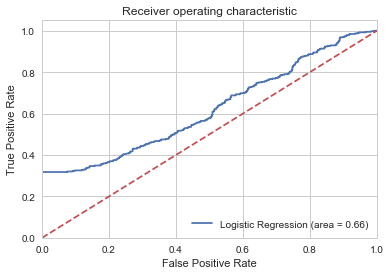

In [185]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")